In [2]:
# import pandas as pd
# pd.options.display.float_format = '{:.0f}'.format
# df1 = pd.read_excel("E23EXAMPLE.xlsx", skiprows=4)
# df1 = df1.loc[:, "사이즈":"단가"].dropna().sort_values("수량")
# df2 = pd.read_excel("E23EXAMPLE.xlsx", skiprows=1)
# df2 = df2.loc[:, "사이즈":"수량"].dropna().sort_values("수량")
# df3 = pd.read_excel("E23EXAMPLE.xlsx", sheet_name=1, skiprows=4)
# df3 = df3.loc[:, "사이즈":"단가"].dropna().sort_values("수량")
# df4 = pd.read_excel("E23EXAMPLE.xlsx", sheet_name=1, skiprows=1)
# df4 = df4.loc[:, "사이즈":"수량"].dropna().sort_values("수량")
# df2["수량"] = df2["수량"].astype("float64")
# df4["수량"] = df4["수량"].astype("float64")


# csv파일 사용시 (특별한 다운로드가 필요없음)
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/"
                 "panda-kim/pandas/main/merge_asof_01.csv")
df1 = df[df["분류"] == "df1"].iloc[:,[0,2,3]].sort_values("수량")
df2 = df[df["분류"] == "df2"].iloc[:,[0,2]].sort_values("수량").reset_index(drop=True)
df3 = df[df["분류"] == "df3"].iloc[:, :4].sort_values("수량").reset_index(drop=True)
df4 = df[df["분류"] == "df4"].iloc[:, :3].sort_values("수량").reset_index(drop=True)


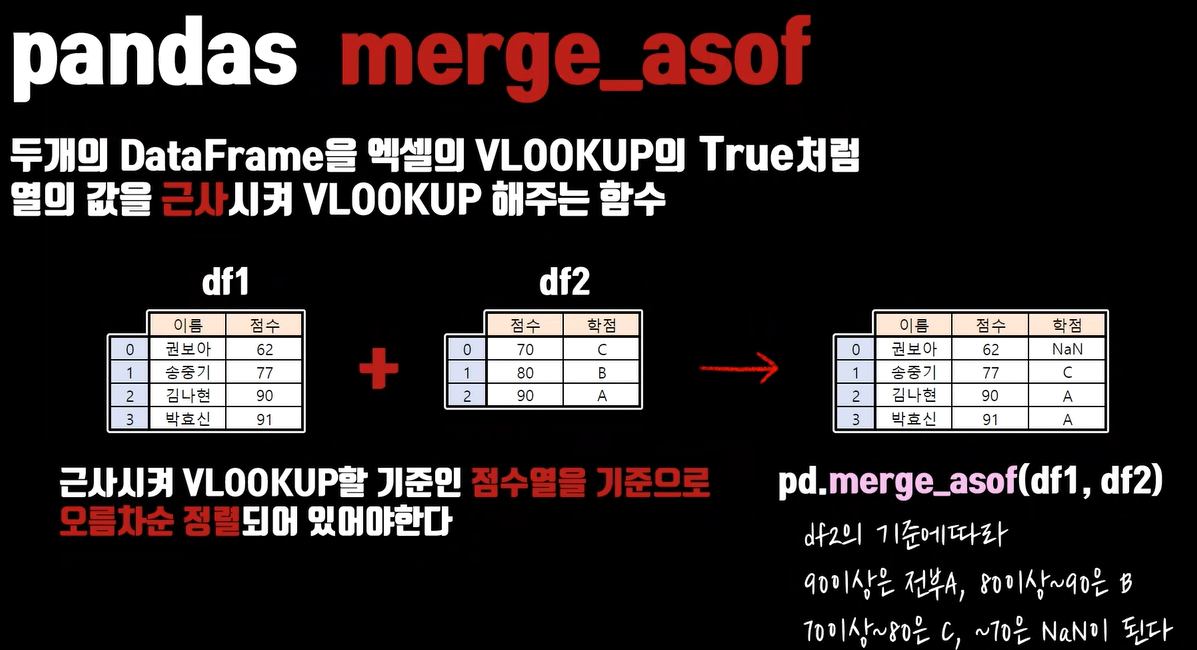

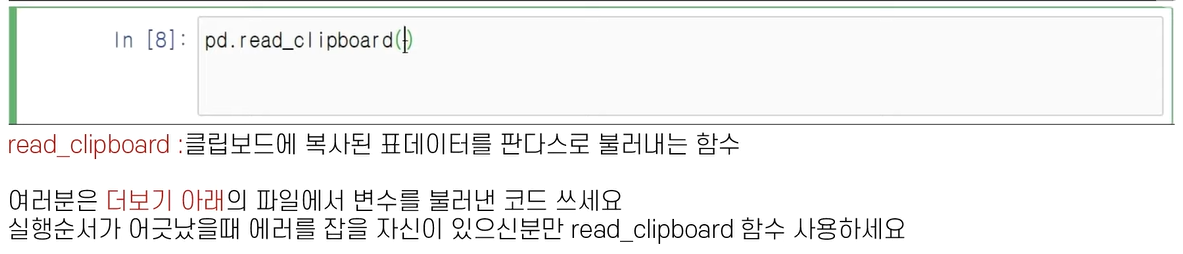

In [3]:

# pd.read_clipboard()
# 엑셀에서 컨트롤+C로 복사한 뒤 실행하면, 클립보드 내용으로 붙여넣을 수 있음
# 주피터노트북 쓰는 경우만 가능함. 파이참에서는 불가
# 그냥 쓰지말자

df1


,사이즈,수량,단가
0,A4,1.0,100.0
1,A3,1.0,200.0
2,B5,1.0,80.0
3,A4,10.0,90.0
4,A3,10.0,180.0
5,B5,10.0,70.0
6,A3,50.0,150.0
7,A4,100.0,70.0
8,B5,100.0,60.0
9,A4,500.0,50.0


In [4]:
df2

,사이즈,수량
0,A3,10.0
1,A4,10.0
2,A4,29.0
3,A3,50.0
4,A3,55.0
...,...,...
95,B5,948.0
96,B5,960.0
97,A4,962.0
98,B5,973.0


In [5]:
pd.merge_asof(df2, df1, on="수량", by="사이즈")

,사이즈,수량,단가
0,A3,10.0,180.0
1,A4,10.0,90.0
2,A4,29.0,90.0
3,A3,50.0,150.0
4,A3,55.0,150.0
...,...,...,...
95,B5,948.0,40.0
96,B5,960.0,40.0
97,A4,962.0,50.0
98,B5,973.0,40.0


In [6]:
df5 = pd.merge_asof(df2, df1, on="수량", by="사이즈")
df5["금액"] = df5["수량"] * df5["단가"]
df5

,사이즈,수량,단가,금액
0,A3,10.0,180.0,1800.0
1,A4,10.0,90.0,900.0
2,A4,29.0,90.0,2610.0
3,A3,50.0,150.0,7500.0
4,A3,55.0,150.0,8250.0
...,...,...,...,...
95,B5,948.0,40.0,37920.0
96,B5,960.0,40.0,38400.0
97,A4,962.0,50.0,48100.0
98,B5,973.0,40.0,38920.0


In [7]:
df5.to_clipboard(index=False)
# 클립보드로 복사한 상태
# 이대로 엑셀에 가서 붙여넣기 가능
# 그냥 쓰지말자..

In [8]:
df4

,사이즈,종류,수량
0,A3,풀컬러,10.0
1,A4,컬러,10.0
2,A4,풀컬러,29.0
3,A3,풀컬러,50.0
4,A3,컬러,55.0
...,...,...,...
95,B5,컬러,948.0
96,B5,풀컬러,960.0
97,A4,컬러,962.0
98,B5,컬러,973.0


In [9]:
pd.merge_asof(df4, df3, on="수량", by=["사이즈", "종류"])


,사이즈,종류,수량,단가
0,A3,풀컬러,10.0,360.0
1,A4,컬러,10.0,90.0
2,A4,풀컬러,29.0,180.0
3,A3,풀컬러,50.0,160.0
4,A3,컬러,55.0,150.0
...,...,...,...,...
95,B5,컬러,948.0,40.0
96,B5,풀컬러,960.0,80.0
97,A4,컬러,962.0,50.0
98,B5,컬러,973.0,40.0


In [10]:
df6 = pd.merge_asof(df4, df3, on="수량", by=["사이즈", "종류"])
df6["금액"] = df6["수량"] * df6["단가"]
df6

,사이즈,종류,수량,단가,금액
0,A3,풀컬러,10.0,360.0,3600.0
1,A4,컬러,10.0,90.0,900.0
2,A4,풀컬러,29.0,180.0,5220.0
3,A3,풀컬러,50.0,160.0,8000.0
4,A3,컬러,55.0,150.0,8250.0
...,...,...,...,...,...
95,B5,컬러,948.0,40.0,37920.0
96,B5,풀컬러,960.0,80.0,76800.0
97,A4,컬러,962.0,50.0,48100.0
98,B5,컬러,973.0,40.0,38920.0
